In [12]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import os
import urllib.request

In [36]:
# Pull the team description
logos = nfl.import_team_desc()

# Keep only the necessary columns in the logos DataFrame
logos = logos[['team_abbr', 'team_logo_espn']]

# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

# Create a folder for the image files if it doesn't exist
if not os.path.exists("logos"):
    os.makedirs("logos")

# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])


# Create a dictionary to put logo_paths and team_abbr in
data = {'team_abbr': team_abbr, 'logo_path': logo_paths}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)

In [62]:
# Load the NFL 2022 PBP data
pbp_df = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [63]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,n_offense,defense_players,n_defense
0,1.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,None,None,NaN,None,NaN,,,0,,0
1,41.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,None,None,NaN,None,NaN,52512;42818;48482;52835;48772;54696;48011;5284...,00-0036421;00-0035933;00-0035609;00-0035942;00...,11,00-0031787;00-0035352;00-0037318;00-0035308;00...,11
2,56.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",4.0,42816;48512;43298;47844;43335;47879;44875;4791...,00-0035382;00-0035689;00-0033904;00-0027648;00...,11,00-0031785;00-0033072;00-0035663;00-0032889;00...,11
3,80.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,EMPTY,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,42816;48512;43298;47844;43335;47879;44875;4791...,00-0035382;00-0035689;00-0033904;00-0027648;00...,11,00-0031785;00-0033072;00-0035663;00-0032889;00...,11
4,101.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,I_FORM,"2 RB, 1 TE, 2 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,42816;48512;42818;43298;47939;47844;43335;4787...,00-0035382;00-0031787;00-0035689;00-0033904;00...,11,00-0031785;00-0033072;00-0035591;00-0035663;00...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,3657.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,0,,0
158,3674.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,LA,home,BUF,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",4.0,42400;46180;46085;43399;46376;53641;41290;4785...,00-0032242;00-0034804;00-0033110;00-0034114;00...,11,00-0034673;00-0036888;00-0036192;00-0034391;00...,11
159,3696.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,LA,home,BUF,...,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"4 DL, 2 LB, 5 DB",4.0,42400;48482;46180;43399;46376;53641;41290;4785...,00-0032242;00-0034804;00-0033110;00-0034114;00...,11,00-0035352;00-0036888;00-0036192;00-0034391;00...,11
160,3718.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,None,"2 RB, 2 TE, 1 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,48512;42816;48770;42818;47939;52835;47844;4787...,00-0035382;00-0031787;00-0035689;00-0031622;00...,11,00-0031785;00-0035607;00-0035591;00-0035933;00...,11


In [64]:
# Filter down to a single game (Week 1: Rams vs. Bills)
pbp_df = pbp_df[pbp_df['game_id'] == '2022_01_BUF_LA']

# Select only the necessary columns
pbp_df = pbp_df[['posteam', 'game_seconds_remaining', 'vegas_wp']]

# Rename posteam to team_abbr
pbp_df = pbp_df.rename(columns={'posteam' : 'team_abbr'})

# Create opposing team W % column
pbp_df['opposing_vegas_wp'] = 1 - pbp_df['vegas_wp']

pbp_df

,team_abbr,game_seconds_remaining,vegas_wp,opposing_vegas_wp
0,BUF,3600.0,0.549646,0.450354
1,BUF,3600.0,0.549646,0.450354
2,BUF,3600.0,0.549646,0.450354
3,BUF,3569.0,0.554871,0.445129
4,BUF,3534.0,0.581946,0.418054
...,...,...,...,...
157,None,51.0,0.000513,0.999487
158,LA,51.0,0.000513,0.999487
159,LA,47.0,0.000375,0.999625
160,BUF,41.0,0.999771,0.000229


In [60]:
# Create a DataFrame for visualization by joining logo_df and pbp_df
vis_df = pd.merge(pbp_df, logo_df)

# # Create Buffalo vis_df
# buf_vis_df = vis_df[vis_df['team_abbr'] == 'BUF']
#
# # Create Buffalo vis_df
# la_vis_df = vis_df[vis_df['team_abbr'] == 'LA']

# Multiply the W% columns by 100


la_vis_df

,team_abbr,game_seconds_remaining,vegas_wp,logo_path
70,LA,3296.0,0.294588,logos/LA.tif
71,LA,3292.0,0.292029,logos/LA.tif
72,LA,3268.0,0.280906,logos/LA.tif
73,LA,3244.0,0.274731,logos/LA.tif
74,LA,3205.0,0.264167,logos/LA.tif
...,...,...,...,...
147,LA,136.0,0.000437,logos/LA.tif
148,LA,120.0,0.000996,logos/LA.tif
149,LA,75.0,0.000541,logos/LA.tif
150,LA,51.0,0.000513,logos/LA.tif


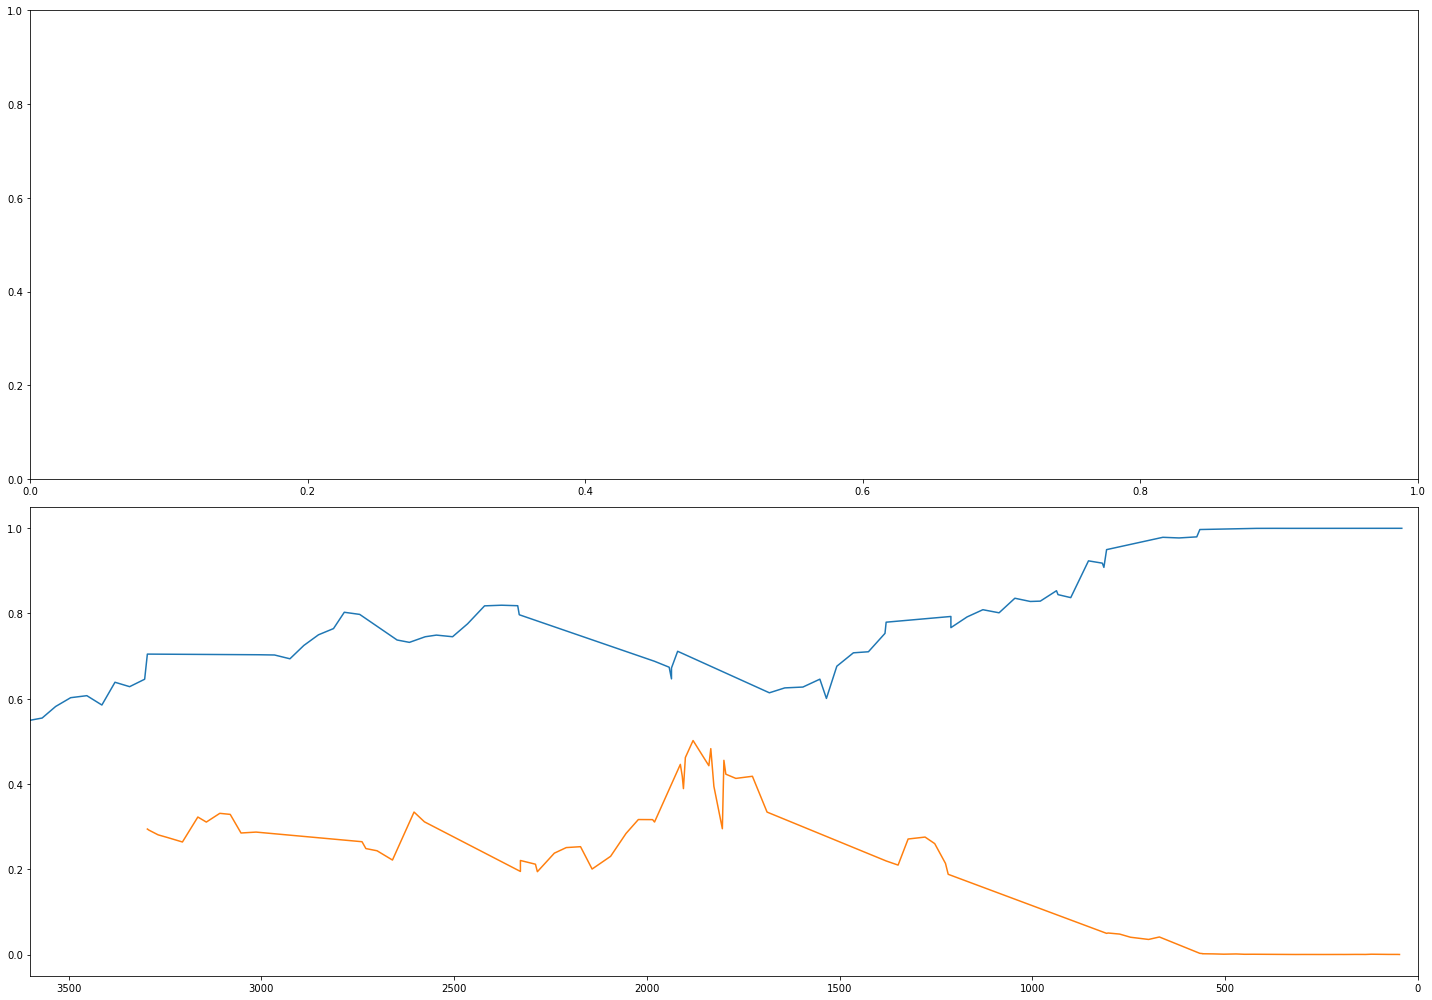

In [59]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the plot
fig, ax = plt.subplots(2)

plt.plot(buf_vis_df['game_seconds_remaining'], buf_vis_df['vegas_wp'])
plt.plot(la_vis_df['game_seconds_remaining'], la_vis_df['vegas_wp'])
plt.xlim((3600, 0));